In [2]:
%cd C:/Users/Mathieu/Desktop/Projets/Benter

C:\Users\Mathieu\Desktop\Projets\Benter


In [3]:

%matplotlib inline
import collections
import functools

from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
from tqdm import tqdm


from utils import import_data
from winning_horse_models.logistic_regression import LogisticRegressionModel
from constants import PMU_BETTINGS, SOURCE_PMU
from utils.wagering_stategy import compute_expected_return, compute_scenario
import wagering_stategies

from matplotlib import style
style.use('ggplot')

C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Mathieu\Anaconda3\envs\deeplearning\l

In [4]:
winning_model = LogisticRegressionModel.load_model(trainable=False)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
%%time
expected_return_df=compute_expected_return(compute_betting=wagering_stategies.race_betting_best_expected_return,
    source=SOURCE_PMU,
    code_pari="E_SIMPLE_GAGNANT",
    winning_model=winning_model)

C:\Users\Mathieu\Desktop\Projets\Benter\utils\wagering_stategy.py:34: DtypeWarning: Columns (35,46,47,61,62,63,64,87) have mixed types.Specify dtype option on import or set low_memory=False.
  n_races = import_data.get_n_races(source=source, on_split="val")
  0%|                                                                                                                                                                                                        | 0/24690 [00:00<?, ?it/s]C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Mathieu\Desktop\Projets\Benter\utils\preprocess.py:124: SettingWithCopyWarning: 
A value is trying to

Wall time: 36min 7s


In [6]:
%%time
best_proba_expected_return_df=compute_expected_return(compute_betting=wagering_stategies.race_betting_best_winning_proba,
    source=SOURCE_PMU,
    code_pari="E_SIMPLE_GAGNANT",
    winning_model=winning_model)

  0%|                                                                                                                                                                                                        | 0/24690 [00:00<?, ?it/s]C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Mathieu\Desktop\Projets\Benter\utils\preprocess.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ) / standard_

Wall time: 29min 22s


In [7]:
%%time
pmp_expected_return_df = compute_expected_return(compute_betting=wagering_stategies.race_proportional_pari_mutual_proba,
    source=SOURCE_PMU,
    code_pari="E_SIMPLE_GAGNANT",
    winning_model=winning_model)

  0%|                                                                                                                                                                                                        | 0/24690 [00:00<?, ?it/s]C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Mathieu\Desktop\Projets\Benter\utils\preprocess.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ) / standard_

Wall time: 26min 48s


In [8]:
expected_return_df.expected_return.mean()

-0.0809547773536055

In [9]:
best_proba_expected_return_df.expected_return.mean()

-0.09655262189381766

In [10]:
pmp_expected_return_df.expected_return.mean()

-0.138134317355967

In [11]:
for n_horse, n_horse_er_df in expected_return_df.groupby('n_horse'):
    print(n_horse,n_horse_er_df.expected_return.mean() , len(n_horse_er_df), f"{len(n_horse_er_df)/len(expected_return_df):.2%}" )


3 1.199342105263158 2 0.02%
4 -0.5478478213100669 30 0.25%
5 -0.5181184673283344 183 1.53%
6 0.2729259150057608 435 3.65%
7 0.05574965864550908 772 6.47%
8 -0.12637382859980978 1060 8.89%
9 -0.24586935256785622 1044 8.75%
10 -0.1746992252893403 1262 10.58%
11 0.16359400338761917 1164 9.76%
12 -0.06525990730677358 1452 12.17%
13 -0.019633520137967805 808 6.77%
14 0.07251050544512963 1069 8.96%
15 -0.40848356546351994 621 5.21%
16 -0.15595291050545151 1360 11.40%
17 -0.27612084894898775 153 1.28%
18 -0.041529291708624946 477 4.00%
19 -1.0 9 0.08%
20 -1.0 23 0.19%
22 -1.0 1 0.01%
24 -1.0 4 0.03%


In [14]:
for n_horse, n_horse_er_df in best_proba_expected_return_df.groupby('n_horse'):
    print(n_horse,n_horse_er_df.expected_return.mean() , len(n_horse_er_df), f"{len(n_horse_er_df)/len(best_proba_expected_return_df):.2%}" )


3 -0.3280981308411216 2 0.02%
4 -0.31012490654882924 30 0.25%
5 -0.2424039283560406 183 1.53%
6 0.083379593504527 435 3.65%
7 0.010474620078355137 772 6.47%
8 -0.15825064630855293 1060 8.89%
9 -0.05282270343954497 1044 8.75%
10 -0.15362777374242392 1262 10.58%
11 -0.08391774451117835 1164 9.76%
12 -0.1145071946798653 1452 12.17%
13 -0.1020702512055135 808 6.77%
14 -0.07339283685309085 1069 8.96%
15 -0.10237634609689461 621 5.21%
16 -0.06673589513842051 1360 11.40%
17 -0.31655267304267215 153 1.28%
18 -0.1780619956943387 477 4.00%
19 0.701225797885275 9 0.08%
20 -0.8846841443371029 23 0.19%
22 -1.0 1 0.01%
24 0.6434282682512731 4 0.03%


In [13]:
for n_horse, n_horse_er_df in pmp_expected_return_df.groupby('n_horse'):
    print(n_horse,n_horse_er_df.expected_return.mean() , len(n_horse_er_df), f"{len(n_horse_er_df)/len(pmp_expected_return_df):.2%}" )


3 -0.1401472774225283 2 0.02%
4 -0.1403365327209808 30 0.25%
5 -0.1389938226145777 183 1.53%
6 -0.14048328592102374 435 3.65%
7 -0.13839780877838864 772 6.47%
8 -0.13820502052702524 1060 8.89%
9 -0.1388641377309798 1044 8.75%
10 -0.13872972813118956 1262 10.58%
11 -0.13734327448624767 1164 9.76%
12 -0.13416242119747793 1452 12.17%
13 -0.14036226616333483 808 6.77%
14 -0.1403264818983155 1069 8.96%
15 -0.13907671050005693 621 5.21%
16 -0.13785891001183628 1360 11.40%
17 -0.14135659326052957 153 1.28%
18 -0.1352182869070425 477 4.00%
19 -0.1617078327084254 9 0.08%
20 -0.13683293186130524 23 0.19%
22 -0.11994677217391303 1 0.01%
24 -0.14480925273979725 4 0.03%


In [ ]:
expected_return_df.groupby('date').expected_return.agg(lambda s:(s>0).sum())

In [9]:
source="PMU"
for x_race, y_race, odds_race, race_df in tqdm(
        import_data.get_dataset_races(
            source=source,
            on_split="val",
            y_format="rank",
            x_format="sequential_per_horse",
            remove_nan_odds=True,
        ),
        leave=False,
    ):
    race_df['date'].iloc[0]
    break
    
# 2s per race

0it [00:00, ?it/s]C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Mathieu\Desktop\Projets\Benter\utils\preprocess.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ) / standard_scaler_parameters[numerical_feature]["std"]
C:\Users\Mathieu\Desktop\Projets\Benter\utils\preprocess.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [6]:
race_horse_df = import_data.load_featured_data(source="PMU")

C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (35,46,47,61,62,63,64,87) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [7]:
from utils import preprocess
from utils.import_data import extract_x_y_odds

In [10]:
%%time
for _ in tqdm(range(10)):
    # preprocess.preprocess(race_horse_df=race_df, source="PMU") # 600ms for 10 iteration
    x_race, y_race, odds_race = extract_x_y_odds(
    race_df=race_df,
    source="PMU",
    x_format="sequential_per_horse",
    y_format="first_position",
    ) # 700ms for 10 iteration
    winning_model.predict(x=np.expand_dims(x_race, axis=0))[0, :]


  0%|                                                                                                                                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Mathieu\Desktop\Projets\Benter\utils\preprocess.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ) / standard

Wall time: 1.18 s


In [24]:
%%time
winning_model.predict(x=np.expand_dims(x_race, axis=0))[0, :]

Wall time: 2min 40s


array([0.03376123, 0.46529716, 0.05698108, 0.02418576, 0.04256973,
       0.07870656, 0.05181766, 0.01993625, 0.04143308, 0.09266193,
       0.00832335, 0.02454356, 0.01225926, 0.01829657, 0.01406803,
       0.01515883], dtype=float32)

In [12]:
for race_id, race_df in tqdm(race_horse_df.groupby('race_id')):
    continue



  0%|                                                                                                                                                                                                       | 0/117505 [00:00<?, ?it/s]

  0%|                                                                                                                                                                                           | 1/117505 [00:10<338:47:31, 10.38s/it]

  0%|▏                                                                                                                                                                                           | 92/117505 [00:10<3:42:55,  8.78it/s]

  0%|▎                                                                                                                                                                                          | 186/117505 [00:10<1:51:14, 17.58it/s]

  0%|▍                                                            

KeyboardInterrupt: 



 15%|███████████████████████████                                                                                                                                                               | 17073/117505 [00:30<02:58, 562.54it/s]

In [11]:
i

(0,
             horse_name  horse_number  horse_age horse_sex         horse_race  \
 0         ROCCO DARCHE             1          8   HONGRES  TROTTEUR FRANCAIS   
 1          QUEL HERMES             2          9   HONGRES  TROTTEUR FRANCAIS   
 2      QUILLIAN JOYEUX             3          9   HONGRES  TROTTEUR FRANCAIS   
 3      RADIEUX BEGONIA             4          8   HONGRES  TROTTEUR FRANCAIS   
 4   PACHA DE LA FRETTE             5         10   HONGRES  TROTTEUR FRANCAIS   
 5         QUATTRO D'AR             6          9     MALES  TROTTEUR FRANCAIS   
 6    QUITO D'ECROVILLE             7          9   HONGRES  TROTTEUR FRANCAIS   
 7     QUEZIO DE CAYOLA             8          9   HONGRES  TROTTEUR FRANCAIS   
 8     POMPON DE BOLERO             9         10   HONGRES  TROTTEUR FRANCAIS   
 9      QUAMPO MONDO SY            10          9     MALES  TROTTEUR FRANCAIS   
 10   QUITO DE L'ORMEAU            11          9   HONGRES  TROTTEUR FRANCAIS   
 11          RADJAH MAN 

In [25]:
race_df['date'].iloc[0]

'2018-01-01'

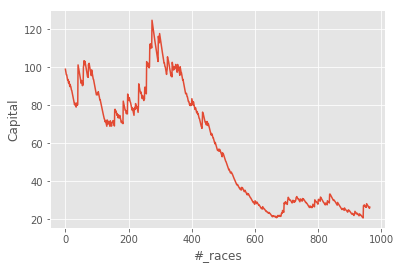

End capital: 26.49, growth rate: -0.14%, exponential growth rate: -0.14%


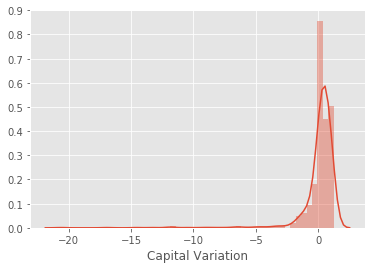

Capital is never null!


In [17]:
sum_proba_races = np.sum(bettings, axis=1)
assert np.all(0<=sum_proba_races) and (np.all(sum_proba_races<=1) or np.all(np.isclose(sum_proba_races, 1.0)))
relative_returns = np.where(y_race==1, bettings*odds*(1-track_take), np.zeros_like(bettings)).sum(axis=1)- np.sum(bettings, axis=1)

capital = np.multiply.accumulate(np.insert(1.0+relative_returns, 0, initial_capital))
data = pd.DataFrame({'Capital Variation':capital[:-1] - capital[1:], "Capital":capital[1:], "Relative returns": relative_returns})
data['#_races']=data.index.to_series()
ax=sns.lineplot(data=data, x="#_races",y="Capital")
plt.show()

exp_growth_rate = np.log(capital[-1]/capital[0])/relative_returns.shape[0]
growth_rate = np.power(capital[-1]/capital[0], 1/relative_returns.shape[0])-1
print(f"End capital: {capital[-1]:.2f}, growth rate: {growth_rate:.2%}, exponential growth rate: {exp_growth_rate:.2%}")
sns.distplot(data['Capital Variation'])
plt.show()
zero_capital_indices =np.argwhere(capital==0.0)
if zero_capital_indices.size==0:
    print('Capital is never null!')
else:
    print(f"No more capital after race n°{zero_capital_indices[0,0]} (index {zero_capital_indices[0,0]-1})")

In [39]:
capital_fraction = 0.01

def compute_scenario(compute_betting):
    np.random.seed(42)
    capital_value = initial_capital
    records=[]
    for x_race, y_race, odds_race in tqdm(import_data.get_dataset_races(source=SOURCE, on_split='val', y_format='rank', remove_nan_odds=True), leave=False):
        odds_race=odds_race*np.sum(1/odds_race) # Rectification to be consistent, HACK since no better data
        betting_race = compute_betting(x_race, odds_race)

        assert 0<=np.sum(betting_race)
        assert np.sum(betting_race)<=1 or np.isclose(np.sum(betting_race), 1.0)

        actual_betting= np.round(betting_race*capital_value,decimals=2)

        capital_value_old=capital_value
        capital_value+= np.where(y_race==1, actual_betting*odds_race*(1-track_take), np.zeros_like(actual_betting)).sum()- np.sum(actual_betting)

        records.append({'Capital Variation': capital_value-capital_value_old, "Capital":capital_value, "Relative Return": (capital_value-capital_value_old)/capital_value_old})


    data = pd.DataFrame.from_records(records)

    data['#_races']=data.index.to_series()
    ax=sns.lineplot(data=data, x="#_races",y="Capital", )
    ax.set(yscale="log")
    plt.show()

    exp_growth_rate = np.log(data['Capital'].iloc[-1]/data['Capital'].iloc[0])/len(data)
    print(f"End capital: {data['Capital'].iloc[-1]:.2f}, exponential growth rate: {exp_growth_rate:.2%}")
    sns.distplot(data['Relative Return'])
    plt.show()

    if (data['Capital']==0).any():
        zero_capital_index = data[data['Capital']==0]['#_races'].iloc[0]
        print(f"No more capital after race n°{zero_capital_index+1} (index {zero_capital_index})")
    else:
        print('Capital is never null!')
    

In [40]:
def race_betting_proportional_positive_return(x_race, odds_race, track_take:float, capital_fraction:float=0.01):
    
    n_horses = x_race.shape[0]
    
    model = utils_model.create_model(n_horses=n_horses, y_format = 'probabilities')
    y_hat_race=model.predict(x=np.expand_dims(x_race, axis=0))[0,:]

    expected_return_race =(y_hat_race*odds_race*(1-track_take))
    positives_returns= np.where(expected_return_race>1, expected_return_race, np.zeros_like(expected_return_race))
    betting_race = positives_returns/np.sum(positives_returns, keepdims=True)
    betting_race[np.isnan(betting_race)]=0
    betting_race=betting_race*capital_fraction
    
    return betting_race

def race_betting_best_expected_return(x_race, odds_race, track_take:float, capital_fraction:float=0.01):
    n_horses = x_race.shape[0]
    
    model = utils_model.create_model(n_horses=n_horses, y_format = 'probabilities')
    y_hat_race=model.predict(x=np.expand_dims(x_race, axis=0))[0,:]

    expected_return_race =(y_hat_race*odds_race*(1-track_take))
    if expected_return_race.max()<=1.0:
        return np.zeros((n_horses,))
    
    betting = expected_return_race==expected_return_race.max()
    assert betting.sum()
    betting =betting/betting.sum()
    betting=betting*capital_fraction
    return betting

def race_bettings_kelly(x_race, odds_race, track_take:float, **kwargs):
    
    n_horses = x_race.shape[0]
    
    model = utils_model.create_model(n_horses=n_horses, y_format = 'probabilities')
    y_hat_race=model.predict(x=np.expand_dims(x_race, axis=0))[0,:]

    expected_return_race =(y_hat_race*odds_race*(1-track_take))
    
    S=[]
    k=1
    R_S =1
    order_index = (-expected_return_race).argsort()

    for kth in order_index:
        if expected_return_race[kth]<R_S:
            break
        S.append(kth)
        R_S = 1 - np.sum(y_hat_race[S])/(1-np.sum(1/(odds_race*(1-track_take))))

    if not S:
        return np.zeros_like(y_hat_race)

    race_f=np.clip((expected_return_race - R_S)/(1-track_take)/odds_race, a_min=0, a_max=None)
    return race_f

def race_betting_proportional_winning_proba(x_race, odds_race, track_take:float, capital_fraction:float=0.01):
    n_horses = x_race.shape[0]
    
    model = utils_model.create_model(n_horses=n_horses, y_format = 'probabilities')
    y_hat_race=model.predict(x=np.expand_dims(x_race, axis=0))[0,:]
    assert np.isclose(y_hat_race.sum(), 1.0)
    betting = y_hat_race*capital_fraction
    
    return betting

def race_betting_best_winning_proba(x_race, odds_race, track_take:float, capital_fraction:float=0.01):
    n_horses = x_race.shape[0]
    
    model = utils_model.create_model(n_horses=n_horses, y_format = 'probabilities')
    y_hat_race=model.predict(x=np.expand_dims(x_race, axis=0))[0,:]
    assert np.isclose(y_hat_race.sum(), 1.0)
    betting = y_hat_race==y_hat_race.max()
    betting = betting/np.sum(betting)
    betting=betting*capital_fraction
    return betting

def race_random_one_horse(x_race, odds_race, track_take:float, capital_fraction:float=0.01):
    n_horses =x_race.shape[0]
    
    betting=np.random.rand(n_horses)
    betting=betting==np.max(betting)
    betting=betting/np.sum(betting)
    betting =betting*capital_fraction
    return betting

def race_random_all_horses(x_race, odds_race, track_take:float, capital_fraction:float=0.01):
    n_horses =x_race.shape[0]
    
    betting=np.ones((n_horses,))/n_horses
    betting =betting*capital_fraction
    return betting

def race_rickiest_horse(x_race, odds_race, track_take:float, capital_fraction:float=0.01):
    n_horses =x_race.shape[0]
    
    betting=odds_race==odds_race.max()
    betting=betting/np.sum(betting)
    betting =betting*capital_fraction
    return betting

def race_least_risky_horse(x_race, odds_race, track_take:float, capital_fraction:float=0.01):
    n_horses =x_race.shape[0]
    
    betting=odds_race==odds_race.min()
    betting=betting/np.sum(betting)
    betting =betting*capital_fraction
    return betting

def race_proportional_odds(x_race, odds_race, track_take:float, capital_fraction:float=0.01):   
    betting=odds_race/np.sum(odds_race)
    betting =betting*capital_fraction
    return betting

def race_proportional_pari_mutual_proba(x_race, odds_race, track_take:float, capital_fraction:float=0.01):
    betting=(1/odds_race)/np.sum((1/odds_race))
    betting =betting*capital_fraction
    return betting

1910it [00:48, 38.99it/s]C:\Users\Mathieu\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


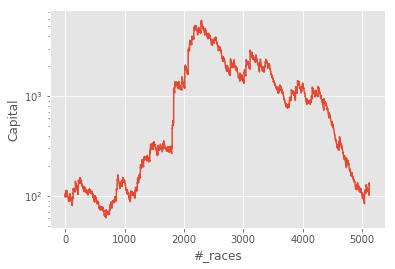

End capital: 127.75, exponential growth rate: 0.00%


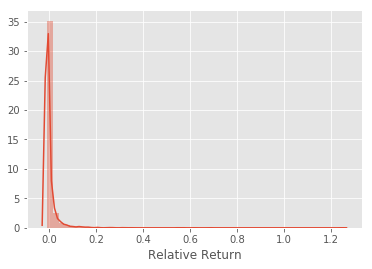

Capital is never null!


In [41]:
capital_fraction=0.01
compute_scenario(functools.partial(race_betting_proportional_positive_return, track_take=track_take, capital_fraction=capital_fraction))

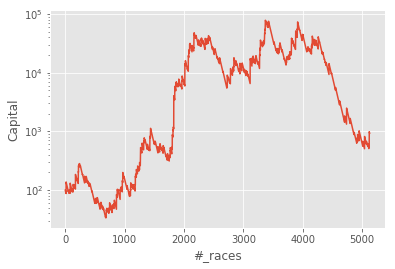

End capital: 924.90, exponential growth rate: 0.04%


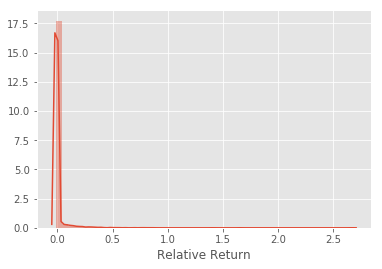

Capital is never null!


In [42]:
capital_fraction=0.01
compute_scenario(functools.partial(race_betting_best_expected_return, track_take=track_take, capital_fraction=capital_fraction))

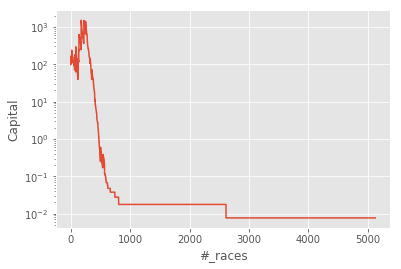

End capital: 0.01, exponential growth rate: -0.18%


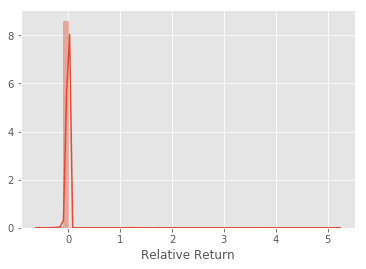

Capital is never null!


In [43]:
compute_scenario(functools.partial(race_bettings_kelly, track_take=track_take))

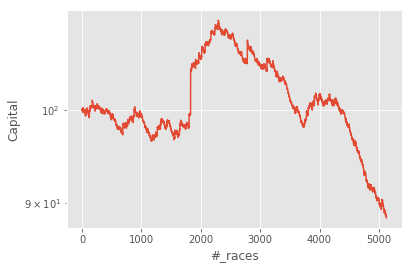

End capital: 88.45, exponential growth rate: -0.00%


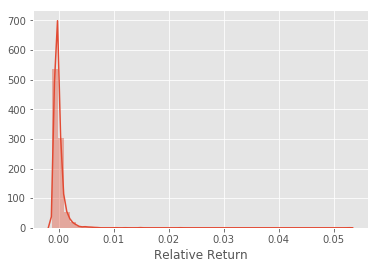

Capital is never null!


In [44]:
capital_fraction=0.001
compute_scenario(functools.partial(race_betting_proportional_winning_proba, track_take=track_take, capital_fraction=capital_fraction))

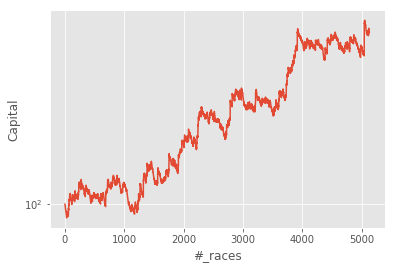

End capital: 143.30, exponential growth rate: 0.01%


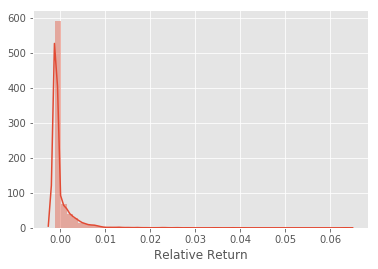

Capital is never null!


In [45]:
capital_fraction=0.001
compute_scenario(functools.partial(race_betting_best_winning_proba, track_take=track_take, capital_fraction=capital_fraction))

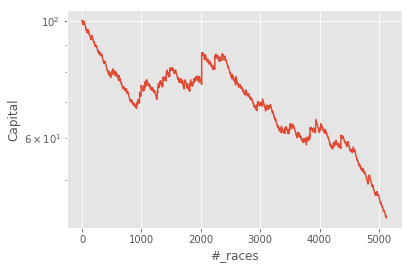

End capital: 42.58, exponential growth rate: -0.02%


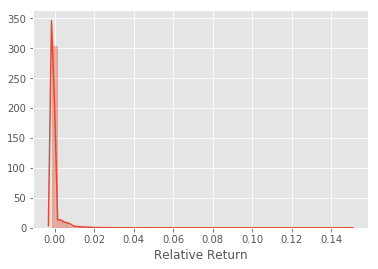

Capital is never null!


In [46]:
capital_fraction=0.001
compute_scenario(functools.partial(race_random_one_horse, track_take=track_take, capital_fraction=capital_fraction))

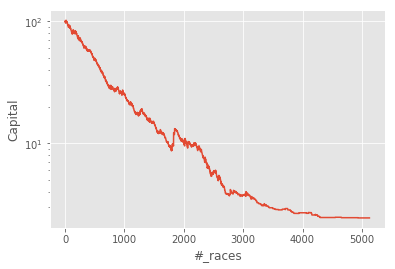

End capital: 2.45, exponential growth rate: -0.07%


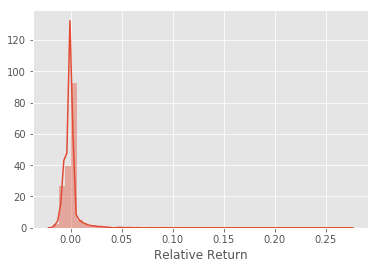

Capital is never null!


In [47]:
capital_fraction=0.01
compute_scenario(functools.partial(race_random_all_horses, track_take=track_take, capital_fraction=capital_fraction))


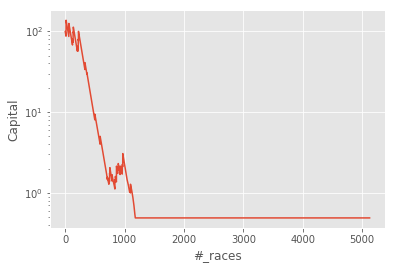

End capital: 0.49, exponential growth rate: -0.10%


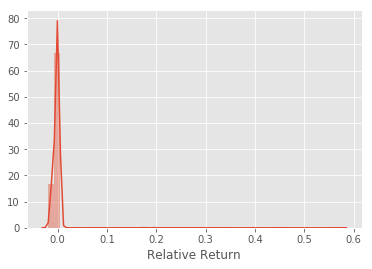

Capital is never null!


In [48]:
capital_fraction=0.01
compute_scenario(functools.partial(race_rickiest_horse, track_take=track_take, capital_fraction=capital_fraction))

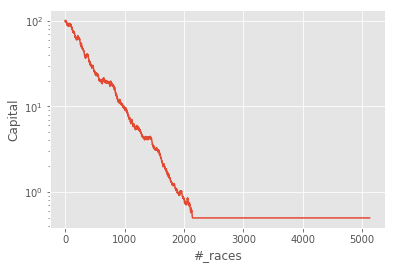

End capital: 0.50, exponential growth rate: -0.10%


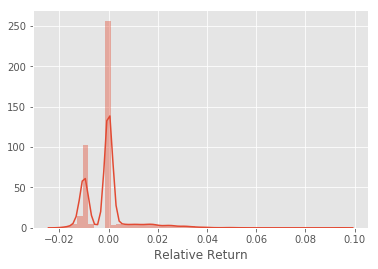

Capital is never null!


In [49]:
capital_fraction=0.01
compute_scenario(functools.partial(race_least_risky_horse, track_take=track_take, capital_fraction=capital_fraction))

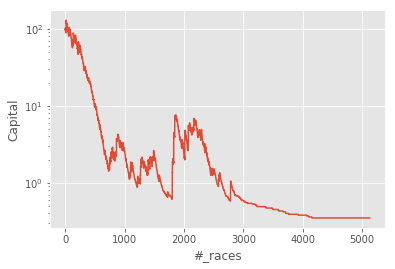

End capital: 0.35, exponential growth rate: -0.11%


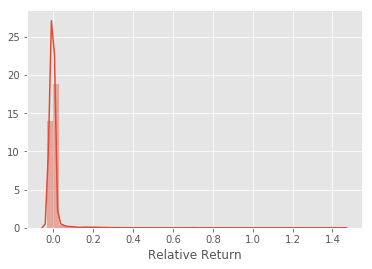

Capital is never null!


In [50]:
capital_fraction=0.02
compute_scenario(functools.partial(race_proportional_odds, track_take=track_take, capital_fraction=capital_fraction))

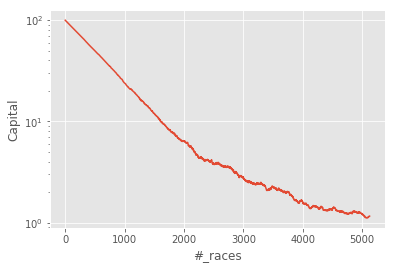

End capital: 1.16, exponential growth rate: -0.09%


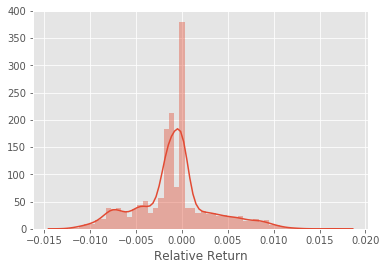

Capital is never null!


In [51]:
capital_fraction=0.01
compute_scenario(functools.partial(race_proportional_pari_mutual_proba, track_take=track_take, capital_fraction=capital_fraction))